In [1]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#import dataset
df = pd.read_excel("/content/Sample.xlsx")

##Data Exploration

In [4]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),No,No,3,4.6,Dark Green,Excellent,873
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",500000,Indonesian Rupiah(IDR),No,No,3,4.9,Dark Green,Excellent,605
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,450000,Indonesian Rupiah(IDR),No,No,3,4.2,Green,Very Good,395
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",350000,Indonesian Rupiah(IDR),No,No,3,4.3,Green,Very Good,243


# Week 1

## Task 1

### Perform preliminary data inspection and report the findings as the structure of the data, missing values, duplicates cleaning variable names etc.

In [5]:
# Preliminary data inspection
structure = df.info()
missing_values = df.isnull().sum()
duplicates = df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4571 entries, 0 to 4570
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         4571 non-null   object 
 1   Restaurant Name       4570 non-null   object 
 2   Country Code          4571 non-null   int64  
 3   City                  4571 non-null   object 
 4   Address               4571 non-null   object 
 5   Locality              4571 non-null   object 
 6   Locality Verbose      4571 non-null   object 
 7   Longitude             4571 non-null   float64
 8   Latitude              4571 non-null   float64
 9   Cuisines              4571 non-null   object 
 10  Average Cost for two  4571 non-null   int64  
 11  Currency              4571 non-null   object 
 12  Has Table booking     4571 non-null   object 
 13  Has Online delivery   4571 non-null   object 
 14  Price range           4571 non-null   int64  
 15  Aggregate rating     

In [6]:
# Clean the variable names
df.columns = df.columns.str.lower().str.replace(' ', '_')

## Task 2

### Based on the findings from the previous questions identify duplicates and remove them.

In [7]:
# Handle missing values
df_cleaned = df.dropna(subset=['restaurant_name'])

In [8]:
# Summary after cleaning
summary_after_cleaning = {
    'missing_values_after_cleaning': df_cleaned.isnull().sum(),
    'duplicates_after_cleaning': df_cleaned.duplicated().sum(),
    'unique_has_table_booking': df_cleaned['has_table_booking'].unique(),
    'unique_has_online_delivery': df_cleaned['has_online_delivery'].unique()
}

print(structure)
print("Missing values before cleaning:", missing_values)
print("Duplicates before cleaning:", duplicates)
print("Variable names after cleaning:", df.columns)
print("Summary after cleaning:", summary_after_cleaning)

None
Missing values before cleaning: Restaurant ID           0
Restaurant Name         1
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64
Duplicates before cleaning: 0
Variable names after cleaning: Index(['restaurant_id', 'restaurant_name', 'country_code', 'city', 'address',
       'locality', 'locality_verbose', 'longitude', 'latitude', 'cuisines',
       'average_cost_for_two', 'currency', 'has_table_booking',
       'has_online_delivery', 'price_range', 'aggregate_rating',
       'rating_color', 'rating_text', 'votes'],
      dtype='object')
Summary after cleaning: {'missing_values_a

# Week 2

## Task 1

### Explore the geographical distribution of the restaurants, finding out the cities  with maximum / minimum number of restaurants.

In [9]:
# Explore the geographical distribution of the restaurants
city_counts = df_cleaned['city'].value_counts()

# Find cities with maximum and minimum number of restaurants
max_restaurants_city = city_counts.idxmax()
max_restaurants_count = city_counts.max()
min_restaurants_city = city_counts.idxmin()
min_restaurants_count = city_counts.min()

print(f"City with maximum number of restaurants: {max_restaurants_city} ({max_restaurants_count} restaurants)")
print(f"City with minimum number of restaurants: {min_restaurants_city} ({min_restaurants_count} restaurant)")


City with maximum number of restaurants: New Delhi (2560 restaurants)
City with minimum number of restaurants: Tagaytay City (1 restaurant)


## Task 2

### Explore how ratings are distributed overall.

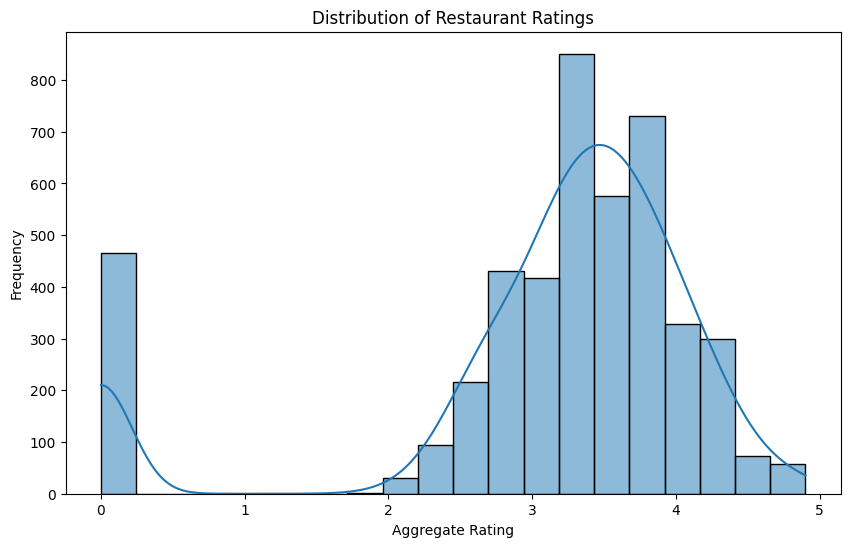

In [10]:
# Explore the distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['aggregate_rating'], bins=20, kde=True)
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.show()


## Task 3

### Restaurant franchise is a thriving venture. So, it becomes very important to explore the franchise with most national presence.

In [11]:
# Determine the franchise with the most national presence
# Count the number of unique cities each restaurant is present in
franchise_presence = df_cleaned.groupby('restaurant_name')['city'].nunique().sort_values(ascending=False)

# Get the restaurant with the most national presence
top_franchise = franchise_presence.idxmax()
top_franchise_cities = franchise_presence.max()

print(f"Franchise with the most national presence: {top_franchise} (present in {top_franchise_cities} cities)")


Franchise with the most national presence: Barbeque Nation (present in 21 cities)


## Task 4

### What is the ratio between restaurants that allow table booking vs that do not allow table booking?

In [20]:
# Calculate the ratio of restaurants that allow table booking vs those that do not
table_booking_counts = df_cleaned['has_table_booking'].value_counts()

# Calculate the ratio
if 'yes' in table_booking_counts and 'no' in table_booking_counts:
    ratio = table_booking_counts['yes'] / table_booking_counts['no']
else:
    ratio = None

print("Table Booking Counts:", table_booking_counts)

Table Booking Counts: has_table_booking
No     3440
Yes    1130
Name: count, dtype: int64


In [22]:
ratio = (1130 / (3440+1130)) * 100
print(f"The ratio between restaurants that allow table booking vs those that do not is {ratio:.2f}%")

The ratio between restaurants that allow table booking vs those that do not is 24.73%


## Task 5

### What is the percentage of restaurants providing online delivery?

In [19]:
# Calculate the ratio of restaurants that allow table booking vs those that do not
online_delivery_count = df_cleaned['has_online_delivery'].value_counts()

# Calculate the ratio
if 'yes' in online_delivery_count and 'no' in online_delivery_count:
    ratio = online_delivery_count['yes'] / online_delivery_count['no']
else:
    ratio = None

print("Online_delivery_count:", online_delivery_count)


Online_delivery_count: has_online_delivery
No     2808
Yes    1762
Name: count, dtype: int64


In [21]:
ratio = (1762 / (2808+1762)) * 100
print(f"the percentage of restaurants providing online delivery is {ratio:.2f}%")

the percentage of restaurants providing online delivery is 38.56%


## Task 6

### Is there a difference in no. of votes for the restaurants that deliver and the restaurant that don’t?



In [24]:
# Filter the DataFrame based on the 'Has Online delivery' column
online_delivery_votes = df[df['has_online_delivery'] == 'Yes']['votes']
no_online_delivery_votes = df[df['has_online_delivery'] == 'No']['votes']

# Calculate the average number of votes for each group
average_votes_online_delivery = online_delivery_votes.mean()
average_votes_no_online_delivery = no_online_delivery_votes.mean()

# Print the results
print(f"Average number of votes for restaurants that provide online delivery: {average_votes_online_delivery:.2f}")
print(f"Average number of votes for restaurants that do not provide online delivery: {average_votes_no_online_delivery:.2f}")

# Check the difference in number of votes
votes_difference = average_votes_online_delivery - average_votes_no_online_delivery
print(f"Difference in number of votes: {votes_difference:.2f}")


Average number of votes for restaurants that provide online delivery: 257.20
Average number of votes for restaurants that do not provide online delivery: 217.99
Difference in number of votes: 39.21


#### Yes there a difference in no. of votes for the restaurants that deliver and the restaurant that don’t. Those who provide online delivery option are given more votes.

# Week 3

## Task 1

### What are the top 10 cuisines served across cities?


In [26]:
# Split the 'Cuisines' column into multiple cuisines
cuisines_series = df['cuisines'].str.split(',').explode().str.strip()

# Count the occurrences of each cuisine
cuisine_counts = cuisines_series.value_counts()

# Get the top 10 cuisines
top_10_cuisines = cuisine_counts.head(10)

# Print the results
print("Top 10 Cuisines served across cities:")
print(top_10_cuisines)


Top 10 Cuisines served across cities:
cuisines
North Indian    2456
Chinese         1748
Fast Food        815
Mughlai          785
Continental      686
Italian          643
Cafe             506
South Indian     270
Pizza            261
Desserts         229
Name: count, dtype: int64


## Task 2

### What is the maximum and minimum no. of cuisines that a restaurant serves? Also, what is the relationship between No. of cuisines served and Ratings


In [30]:
# Calculate the number of cuisines served by each restaurant
df['No_of_cuisines'] = df['cuisines'].str.split(',').apply(len)

# Group by 'restaurant_name' to find the maximum and minimum number of cuisines served by any restaurant
cuisines_by_restaurant = df.groupby('restaurant_name')['No_of_cuisines'].max()

max_cuisines = cuisines_by_restaurant.max()
min_cuisines = cuisines_by_restaurant.min()

print(f"The maximum number of cuisines served by a restaurant is: {max_cuisines}")
print(f"The minimum number of cuisines served by a restaurant is: {min_cuisines}")



The maximum number of cuisines served by a restaurant is: 8
The minimum number of cuisines served by a restaurant is: 1


In [31]:
# Find the restaurants that serve the maximum and minimum number of cuisines
restaurants_max_cuisines = cuisines_by_restaurant[cuisines_by_restaurant == max_cuisines].index.tolist()
restaurants_min_cuisines = cuisines_by_restaurant[cuisines_by_restaurant == min_cuisines].index.tolist()

print(f"Restaurants serving the maximum number of cuisines ({max_cuisines}): {restaurants_max_cuisines}")
print(f"Restaurants serving the minimum number of cuisines ({min_cuisines}): {restaurants_min_cuisines}")


Restaurants serving the maximum number of cuisines (8): ['Bikanervala', 'Indian Summer Cafe', 'Marble', 'Mumbai Vibe', "R' ADDA", 'The Belgian Triple']
Restaurants serving the minimum number of cuisines (1): ['#45', '#Dilliwaala6', '#hashtag', '13 Cafe', '24/7 Bar- The Lalit New Delhi', '28 Capri Italy', '3 Wise Monkeys', '4th Street Cafe', '56 Fresca', '56 Ristorante Italiano', '6 Ballygunge Place', '60 ML - Country Inn & Suites by Carlson', 'A One Rasoi', 'A W Foods', 'A1 Restaurant', 'ADM Foodi', 'AK Your Food', 'ATM Bistro', 'Aapka Mangal Restaurant', 'Aarush - A Mediterranean Kitchen', 'Abar Khabo', 'Aces - The Card Room', 'Afghan Indian', 'Ahad Sons Restaurant', 'Ahata', 'Al Arabian Express', 'Al- Laziz', 'Alaturka', 'Alcoholic Lounge & Bar', 'Aloo Bhaji Restaurant', 'Amalfi', 'Anand Restaurant', 'Anandini - The Tea Room', 'Ano Tai - Jaypee Vasant Continental', 'Antares', 'Anwar Food Corner', 'Apache', 'Apna Punjabi Zayka', 'Apni Rasoi', 'Arabian Nites', 'Arabicaa 9', 'Armory - H

In [28]:
# Analyze the relationship between the number of cuisines served and the ratings
relationship_df = df[['No_of_cuisines', 'aggregate_rating']]

# Calculate the correlation between the number of cuisines served and the ratings
correlation = relationship_df.corr().iloc[0, 1]

print(f"The correlation between the number of cuisines served and the ratings is: {correlation:.2f}")

The correlation between the number of cuisines served and the ratings is: 0.18


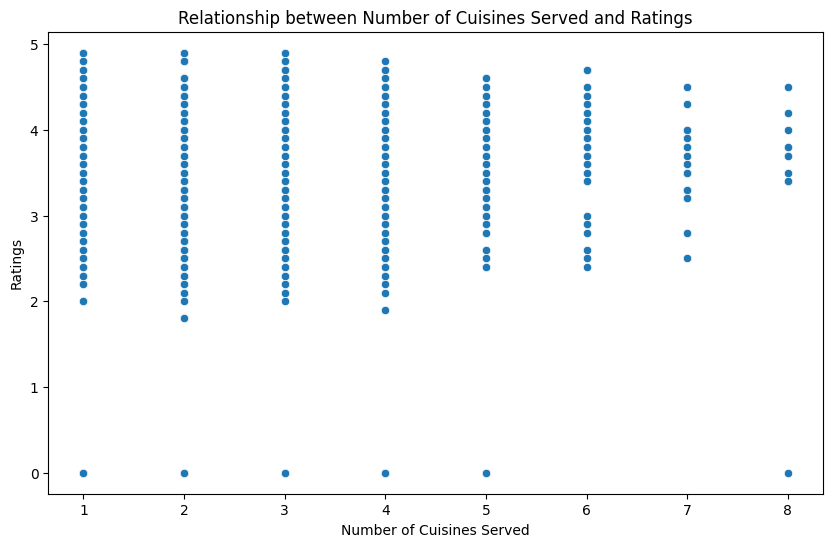

In [29]:
# plot the relationship (if you have a plotting library such as matplotlib or seaborn)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=relationship_df, x='No_of_cuisines', y='aggregate_rating')
plt.title('Relationship between Number of Cuisines Served and Ratings')
plt.xlabel('Number of Cuisines Served')
plt.ylabel('Ratings')
plt.show()


## Task 3

### Discuss the cost vs the other variables.

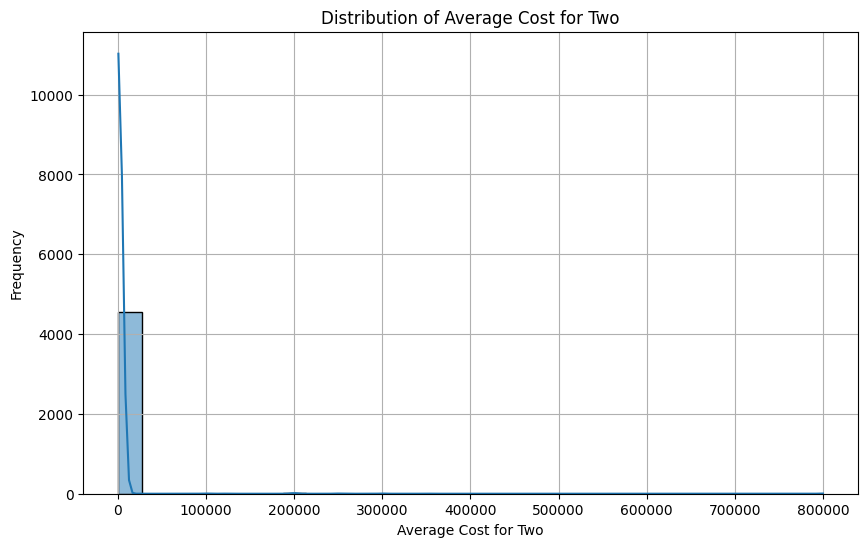

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'average_cost_for_two' is of type int64
df['average_cost_for_two'] = df['average_cost_for_two'].astype('int64')

# Select the columns for comparison
columns_to_compare = ['restaurant_name', 'average_cost_for_two']

# Create a new DataFrame with the selected columns
comparison_df = df[columns_to_compare]

# Plot a histogram for 'average_cost_for_two'
plt.figure(figsize=(10, 6))
sns.histplot(comparison_df['average_cost_for_two'], bins=30, kde=True)
plt.title('Distribution of Average Cost for Two')
plt.xlabel('Average Cost for Two')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

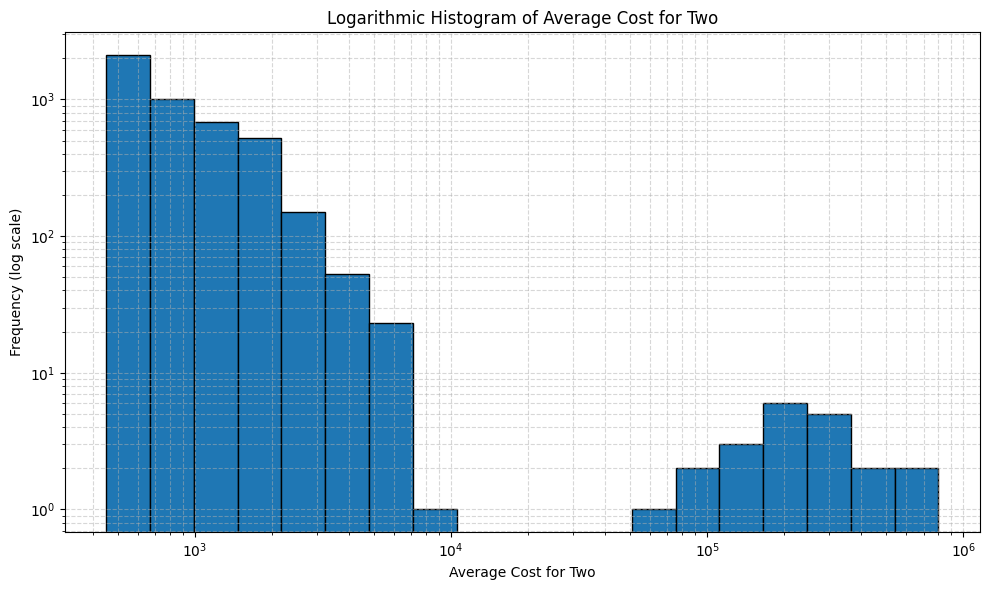

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming average_cost_for_two is already int64 type
df['average_cost_for_two'] = pd.to_numeric(df['average_cost_for_two'], errors='coerce')

# Remove NaN values if any
df = df.dropna()

# Step 2: Create logarithmic bins
# Calculate the logarithmic bins
log_min = np.log10(df['average_cost_for_two'].min())
log_max = np.log10(df['average_cost_for_two'].max())
bins = np.logspace(log_min, log_max, 20)  # You can adjust the number of bins (20 in this case)

# Step 3: Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['average_cost_for_two'], bins=bins, edgecolor='black', log=True)
plt.xscale('log')
plt.xlabel('Average Cost for Two')
plt.ylabel('Frequency (log scale)')
plt.title('Logarithmic Histogram of Average Cost for Two')
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.tight_layout()
plt.show()


## Task 4

In [25]:
df.columns

Index(['restaurant_id', 'restaurant_name', 'country_code', 'city', 'address',
       'locality', 'locality_verbose', 'longitude', 'latitude', 'cuisines',
       'average_cost_for_two', 'currency', 'has_table_booking',
       'has_online_delivery', 'price_range', 'aggregate_rating',
       'rating_color', 'rating_text', 'votes'],
      dtype='object')

In [ ]:
print (loan)

NameError: name 'loan' is not defined